# Classification and Regression Algorithms
## Business Case
<img src="car_insurance.png" alt="car_insurance" width="400"/>

 Auto Insurance -- McDougall Insurance & Financial
The total number of road motor vehicles registered in Canada increased to 26.2 million in 2021, up 1.9% over 2020.(Government of Canada, 2023).This number is expected to grow by 2.5% annually, reaching 29.5 million by 2025. With such a large number of vehicles on the road, the demand for car insurance is expected to increase significantly.
And auto insurance is mandatory for all the drivers. It is easy to make profit for big insurance companies since they have a large user base, but for smaller insurance companies it is important to select the users that are less likely to claim the insurance. 
### Product or Service Description
Build a software that can help McDougall Insurance to determine whether the customers are going to claim the insurance after an accident. This algorithm can bring the company the following three benefit:
1. Risk assessment: This product can help the company to detriment the likelihood of if a user will file a claim. This helps reduce the risk of overwhelming claims. 
2. Pricing: This can help them to give quotes to new users that are reasonable pricing based on the possibility of them filing a claim.
### Business Value
With the implementation of this algorithm the company can have the following benefit.
1. Cost saving: With the reduced high risk users and quotes based on the likelihood of insurance claiming. The cost can be minimized.
2. Customer experience: With this algorithm the customers that are less likely to claim insurance and have few issues are likely to be more satisfied with the company.
With those benefits, the business will be improved in the following years. 
### Budget
Service Cost: 
Spending 5 hours a month in the Notebook Instance – 5 * $0.10 = $0.50
Training the data once a month for 1 hour 30 mins using ml.c4.xlarge – 1.5 * $0.239 = $0.3585
Store the data with SSD: 1.5 * $0.14 = $0.21
200 inference a month with request taking 100 ms for a total of 200,000 ms – 200,000 ms * $0.00008 = $16
Total = $17.07 per month  Cost = $204.82 per year
If we have a fix cost for 10,000 then yearly cost would be $ 10,204.82

### Investment Analysis
Suppose the investment amount is 10,000, I believe this implemetation would increase the profit by 5%. So the investment will increase to 10,500. The cost will be 204.82 which will bring the gain to 500-204.82 = $295.18
* ROC = 295.18/10,000 = 2.9% with out the dividence from the stock.


# Data

## Data Set
https://www.kaggle.com/datasets/sagnik1511/car-insurance-data

## Context
The company has shared its annual car insurance data. The object is to perdict based on the person's used car info where the driver will clame the insurance. 

## Content
1. ID: The identification of the driver 
2. AGE: The age range that the driver
3. GENDER: The gender 
4. RACE: Majority or minority
5. DRIVING_EXPERIENCE: Years range that the driver has drived 
6. EDUCATION: The education level of the driver
7. INCOME: The class the driver is in
8. CREDIT_SCORE: Credit score
9. VEHICLE_OWNERSHIP: If they own the vehivle (0 or 1)
10. VEHICLE_YEAR: If vehicle is made before 2015 or after 
11. MARRIED: If the driver is married (0 or 1)
12. CHILDREN: If the driver has children (0 or 1)
13. POSTAL_CODE: Postal code 
14. ANNUAL_MILEAGE: The mileage of the vehicle in a year 
15. VEHICLE_TYPE: Vehicle type
16. SPEEDING_VIOLATIONS: Number of time the driver has speed
17. DUIS: Number of DUIs the driver has
18. PAST_ACCIDENTS: Number of accidents the driver was in
19. OUTCOME: Class variable (0 or 1)

# Prepare the Environment
## Upgrade the version of boto3 and sagemaker

In [1]:
%pip install -qU --upgrade boto3
%pip install -qU --upgrade sagemaker

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import sagemaker
from sagemaker import get_execution_role
from sagemaker.amazon.amazon_estimator import get_image_uri
import boto3
import sklearn
from time import gmtime, strftime

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

## Setup your your environment variables

In [4]:
role = get_execution_role()
sess = sagemaker.Session() 
region = sess.boto_session.region_name
bucket = sess.default_bucket()
print("The role is ", role)
print("The session is ", sess)
print("The region is ", region)
print("The bucket is ", bucket)

The role is  arn:aws:iam::023762781367:role/LabRole
The session is  <sagemaker.session.Session object at 0x7f3cf70d46d0>
The region is  us-east-1
The bucket is  sagemaker-us-east-1-023762781367


In [5]:
df = pd.read_csv('Car_Insurance_Claim.csv')
df.head(10)

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0
5,877557,40-64,female,majority,20-29y,high school,upper class,0.619127,1.0,after 2015,0.0,1.0,10238,13000.0,sedan,3,0,3,0.0
6,930134,65+,male,majority,30y+,high school,upper class,0.492944,0.0,after 2015,1.0,1.0,10238,13000.0,sedan,7,0,3,0.0
7,461006,26-39,female,majority,0-9y,university,working class,0.468689,0.0,after 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,1.0
8,68366,40-64,female,majority,20-29y,university,working class,0.521815,0.0,before 2015,1.0,0.0,10238,13000.0,sedan,0,0,0,0.0
9,445911,40-64,female,majority,0-9y,high school,upper class,0.561531,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,1.0


To reverse the data so the outcome can be in the first column 

In [6]:
cols = list(df.columns)
cols.reverse()
df = df[cols]
df.head(10)

,OUTCOME,PAST_ACCIDENTS,DUIS,SPEEDING_VIOLATIONS,VEHICLE_TYPE,ANNUAL_MILEAGE,POSTAL_CODE,CHILDREN,MARRIED,VEHICLE_YEAR,VEHICLE_OWNERSHIP,CREDIT_SCORE,INCOME,EDUCATION,DRIVING_EXPERIENCE,RACE,GENDER,AGE,ID
0,0.0,0,0,0,sedan,12000.0,10238,1.0,0.0,after 2015,1.0,0.629027,upper class,high school,0-9y,majority,female,65+,569520
1,1.0,0,0,0,sedan,16000.0,10238,0.0,0.0,before 2015,0.0,0.357757,poverty,none,0-9y,majority,male,16-25,750365
2,0.0,0,0,0,sedan,11000.0,10238,0.0,0.0,before 2015,1.0,0.493146,working class,high school,0-9y,majority,female,16-25,199901
3,0.0,0,0,0,sedan,11000.0,32765,1.0,0.0,before 2015,1.0,0.206013,working class,university,0-9y,majority,male,16-25,478866
4,1.0,1,0,2,sedan,12000.0,32765,0.0,0.0,before 2015,1.0,0.388366,working class,none,10-19y,majority,male,26-39,731664
5,0.0,3,0,3,sedan,13000.0,10238,1.0,0.0,after 2015,1.0,0.619127,upper class,high school,20-29y,majority,female,40-64,877557
6,0.0,3,0,7,sedan,13000.0,10238,1.0,1.0,after 2015,0.0,0.492944,upper class,high school,30y+,majority,male,65+,930134
7,1.0,0,0,0,sedan,14000.0,10238,1.0,0.0,after 2015,0.0,0.468689,working class,university,0-9y,majority,female,26-39,461006
8,0.0,0,0,0,sedan,13000.0,10238,0.0,1.0,before 2015,0.0,0.521815,working class,university,20-29y,majority,female,40-64,68366
9,1.0,0,0,0,sedan,11000.0,32765,1.0,0.0,before 2015,1.0,0.561531,upper class,high school,0-9y,majority,female,40-64,445911


## Data Exploration

In [7]:
# showing the data name and the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   OUTCOME              10000 non-null  float64
 1   PAST_ACCIDENTS       10000 non-null  int64  
 2   DUIS                 10000 non-null  int64  
 3   SPEEDING_VIOLATIONS  10000 non-null  int64  
 4   VEHICLE_TYPE         10000 non-null  object 
 5   ANNUAL_MILEAGE       9043 non-null   float64
 6   POSTAL_CODE          10000 non-null  int64  
 7   CHILDREN             10000 non-null  float64
 8   MARRIED              10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  VEHICLE_OWNERSHIP    10000 non-null  float64
 11  CREDIT_SCORE         9018 non-null   float64
 12  INCOME               10000 non-null  object 
 13  EDUCATION            10000 non-null  object 
 14  DRIVING_EXPERIENCE   10000 non-null  object 
 15  RACE                 10000 non-null  

showing the columns that has empty data

In [8]:
df.isnull().sum()

OUTCOME                  0
PAST_ACCIDENTS           0
DUIS                     0
SPEEDING_VIOLATIONS      0
VEHICLE_TYPE             0
ANNUAL_MILEAGE         957
POSTAL_CODE              0
CHILDREN                 0
MARRIED                  0
VEHICLE_YEAR             0
VEHICLE_OWNERSHIP        0
CREDIT_SCORE           982
INCOME                   0
EDUCATION                0
DRIVING_EXPERIENCE       0
RACE                     0
GENDER                   0
AGE                      0
ID                       0
dtype: int64

showing the information of the data 

In [9]:
df.describe()

,OUTCOME,PAST_ACCIDENTS,DUIS,SPEEDING_VIOLATIONS,ANNUAL_MILEAGE,POSTAL_CODE,CHILDREN,MARRIED,VEHICLE_OWNERSHIP,CREDIT_SCORE,ID
count,10000.000000,10000.000000,10000.00000,10000.000000,9043.000000,10000.000000,10000.000000,10000.000000,10000.000000,9018.000000,10000.000000
mean,0.313300,1.056300,0.23920,1.482900,11697.003207,19864.548400,0.688800,0.498200,0.697000,0.515813,500521.906800
std,0.463858,1.652454,0.55499,2.241966,2818.434528,18915.613855,0.463008,0.500022,0.459578,0.137688,290030.768758
min,0.000000,0.000000,0.00000,0.000000,2000.000000,10238.000000,0.000000,0.000000,0.000000,0.053358,101.000000
25%,0.000000,0.000000,0.00000,0.000000,10000.000000,10238.000000,0.000000,0.000000,0.000000,0.417191,249638.500000
50%,0.000000,0.000000,0.00000,0.000000,12000.000000,10238.000000,1.000000,0.000000,1.000000,0.525033,501777.000000
75%,1.000000,2.000000,0.00000,2.000000,14000.000000,32765.000000,1.000000,1.000000,1.000000,0.618312,753974.500000
max,1.000000,15.000000,6.00000,22.000000,22000.000000,92101.000000,1.000000,1.000000,1.000000,0.960819,999976.000000


showning the correlation of the data before transformation (only numerical data type)

In [10]:
df.corr()

,OUTCOME,PAST_ACCIDENTS,DUIS,SPEEDING_VIOLATIONS,ANNUAL_MILEAGE,POSTAL_CODE,CHILDREN,MARRIED,VEHICLE_OWNERSHIP,CREDIT_SCORE,ID
OUTCOME,1.000000,-0.311495,-0.189352,-0.291862,0.187154,0.095889,-0.232835,-0.262104,-0.378921,-0.325286,-0.010506
PAST_ACCIDENTS,-0.311495,1.000000,0.259359,0.443074,-0.195217,-0.116985,0.206295,0.215269,0.119521,0.180978,0.001831
DUIS,-0.189352,0.259359,1.000000,0.359838,-0.116598,0.038492,0.115354,0.120840,0.086567,0.127366,0.009268
SPEEDING_VIOLATIONS,-0.291862,0.443074,0.359838,1.000000,-0.323547,0.113686,0.220415,0.218855,0.133868,0.204542,0.008156
ANNUAL_MILEAGE,0.187154,-0.195217,-0.116598,-0.323547,1.000000,-0.133978,-0.447655,-0.462193,-0.097433,-0.174453,-0.002217
POSTAL_CODE,0.095889,-0.116985,0.038492,0.113686,-0.133978,1.000000,0.020911,0.012045,-0.004866,0.009040,0.006038
CHILDREN,-0.232835,0.206295,0.115354,0.220415,-0.447655,0.020911,1.000000,0.287009,0.125990,0.220658,0.001233
MARRIED,-0.262104,0.215269,0.120840,0.218855,-0.462193,0.012045,0.287009,1.000000,0.175626,0.281238,0.014826
VEHICLE_OWNERSHIP,-0.378921,0.119521,0.086567,0.133868,-0.097433,-0.004866,0.125990,0.175626,1.000000,0.312037,0.009197
CREDIT_SCORE,-0.325286,0.180978,0.127366,0.204542,-0.174453,0.009040,0.220658,0.281238,0.312037,1.000000,0.001704


### Some Visualization of the data/Data Insights

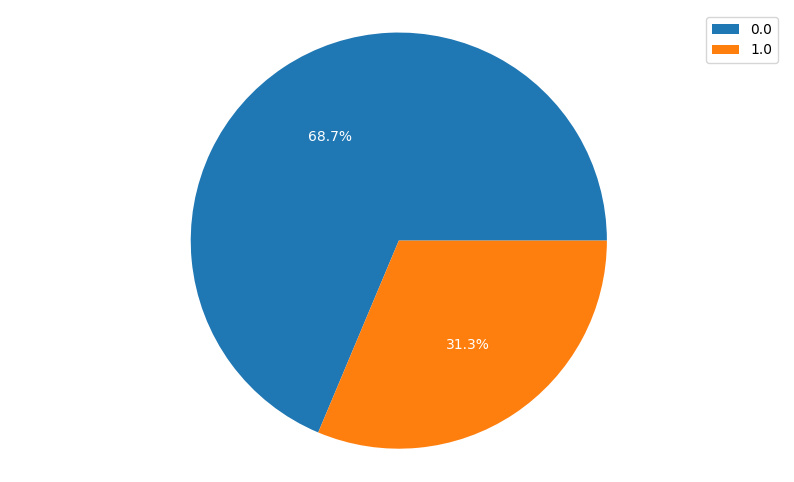

In [11]:
plt.figure(figsize=(10,6))
plt.pie(df['OUTCOME'].value_counts(), labels=df['OUTCOME'].unique(), autopct='%.1f%%', textprops={'color':"w"})
plt.legend(loc='upper right')
plt.axis('equal')
plt.show()

The following graph will show the relation of the outcome with some of the feature that the data has

<AxesSubplot:title={'center':'AGE vs. Outcome'}, xlabel='AGE', ylabel='count'>

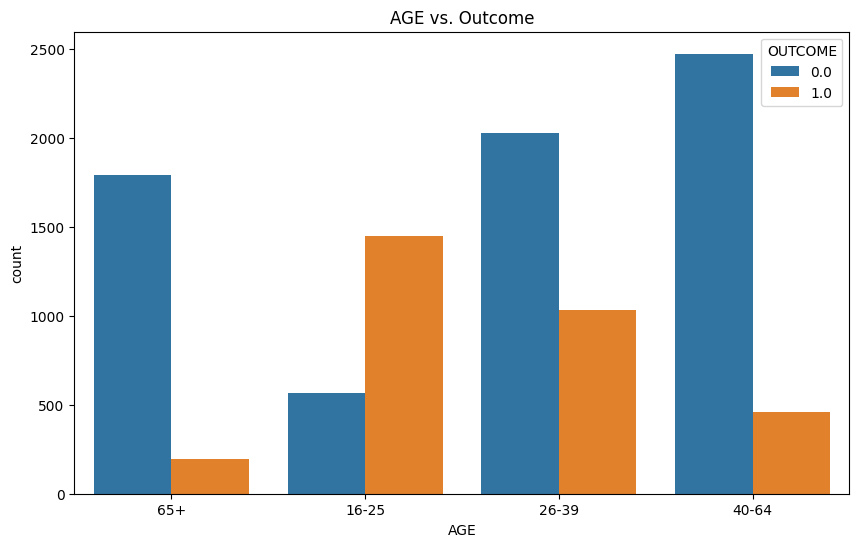

In [12]:
plt.figure(figsize=(10,6))
plt.title('AGE vs. Outcome')
sns.countplot(df, x ='AGE', hue='OUTCOME')

<AxesSubplot:title={'center':'DRIVING_EXPERIENCE vs. OUTCOME'}, xlabel='DRIVING_EXPERIENCE', ylabel='count'>

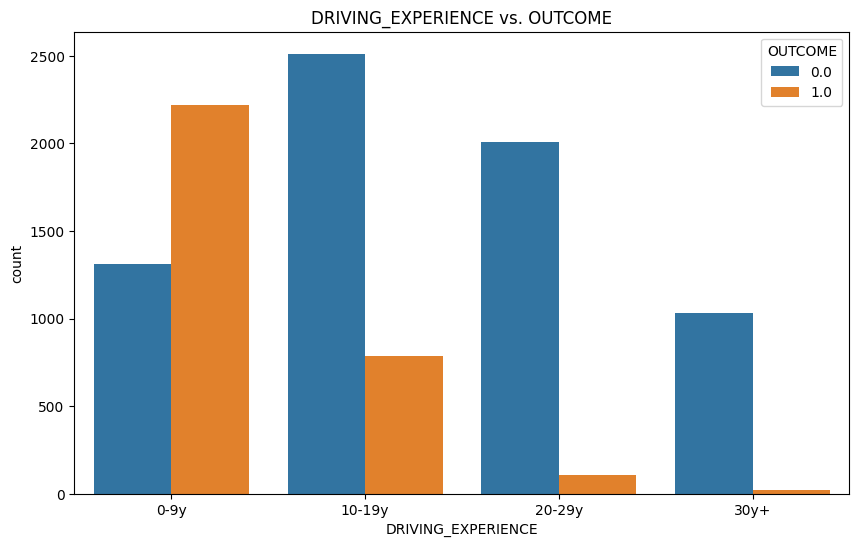

In [13]:
plt.figure(figsize=(10,6))
plt.title('DRIVING_EXPERIENCE vs. OUTCOME')
sns.countplot(df, x ='DRIVING_EXPERIENCE', hue='OUTCOME')

<AxesSubplot:title={'center':'EDUCATION vs. OUTCOME'}, xlabel='EDUCATION', ylabel='count'>

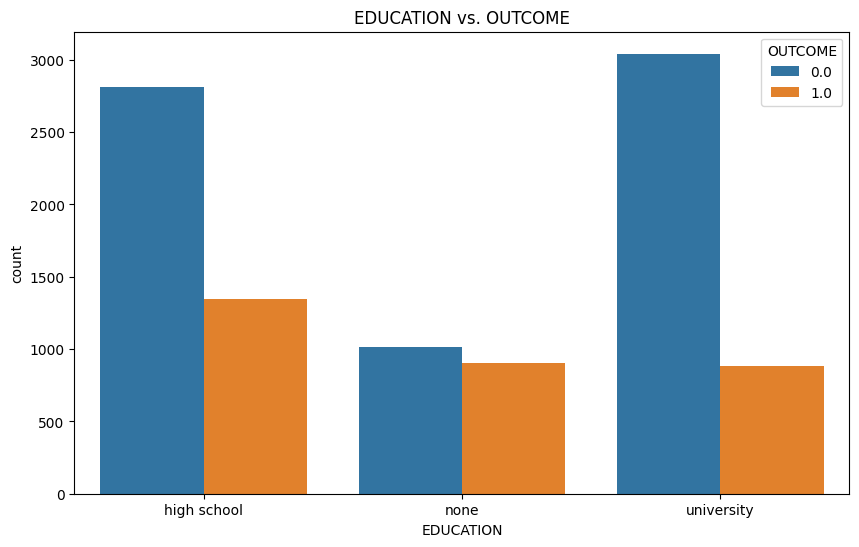

In [14]:
plt.figure(figsize=(10,6))
plt.title('EDUCATION vs. OUTCOME')
sns.countplot(df, x ='EDUCATION', hue='OUTCOME')

<AxesSubplot:title={'center':'INCOME vs. OUTCOME'}, xlabel='INCOME', ylabel='count'>

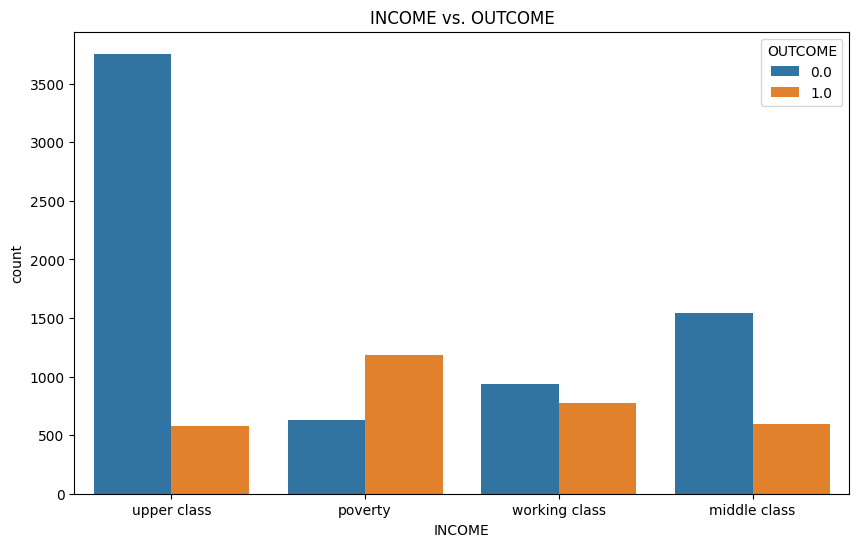

In [15]:
plt.figure(figsize=(10,6))
plt.title('INCOME vs. OUTCOME')
sns.countplot(df, x ='INCOME', hue='OUTCOME')

The graphs above shows the relationship of the outcome with some of the attribute in the data. As we can see it is a pretty linear relation.

The following graph shows the skewness of the attribute:

<AxesSubplot:title={'center':'Distribution of CREDIT_SCORE'}, xlabel='CREDIT_SCORE', ylabel='Count'>

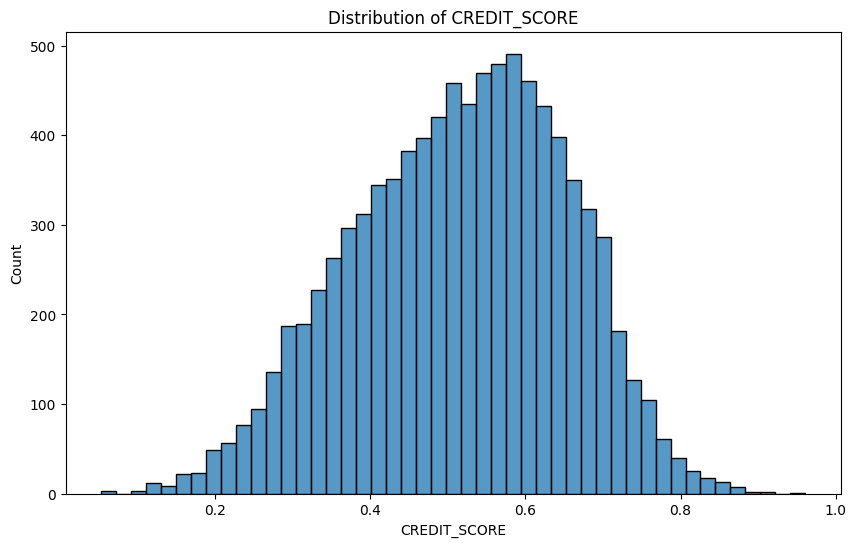

In [16]:
plt.figure(figsize=(10,6))
plt.title('Distribution of CREDIT_SCORE')
sns.histplot(df, x ='CREDIT_SCORE')

The credit score is a bit right skew but not by a lot therefor does not need to be changed

<AxesSubplot:title={'center':'Distribution of ANNUAL_MILEAGE'}, xlabel='ANNUAL_MILEAGE', ylabel='Count'>

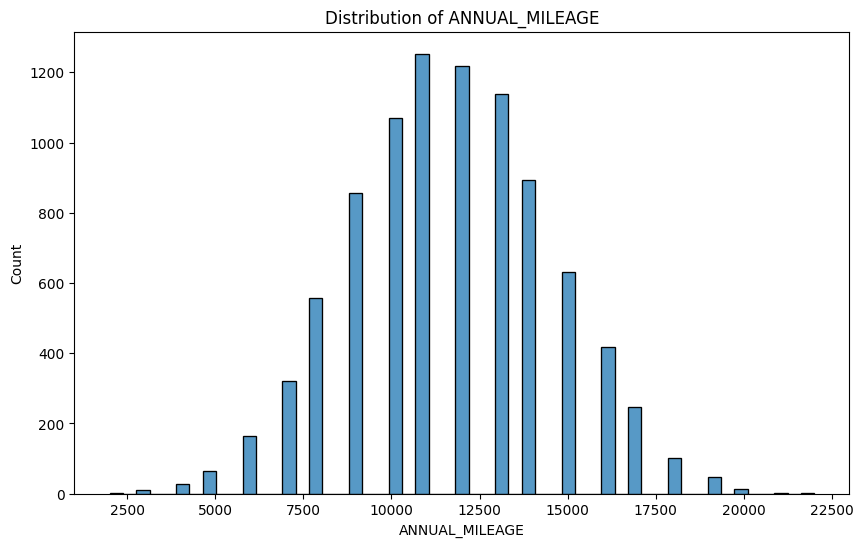

In [17]:
plt.figure(figsize=(10,6))
plt.title('Distribution of ANNUAL_MILEAGE')
sns.histplot(df, x ='ANNUAL_MILEAGE')

The distribution of annaual mileage is symmetry.

The correlation before data cleaning.

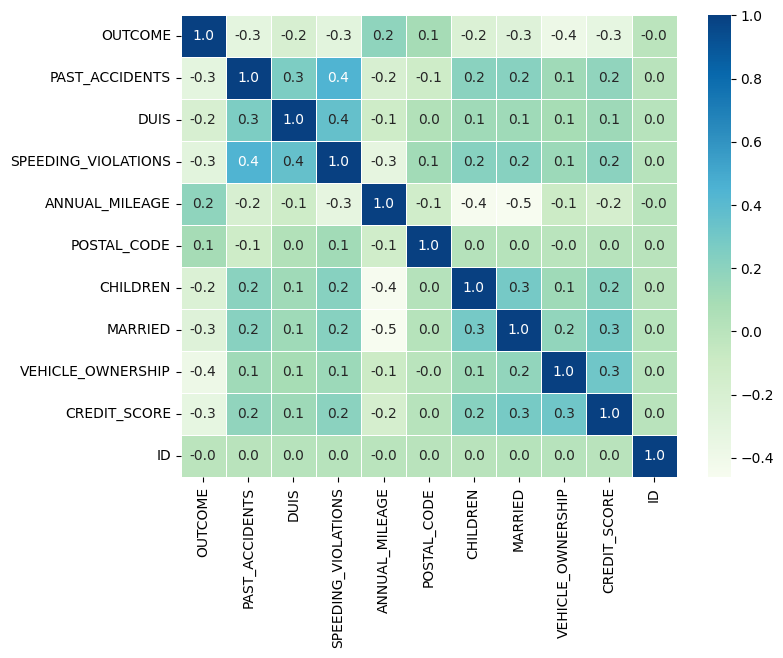

In [18]:
f,ax = plt.subplots(figsize=(8,6))
sns.heatmap(df.corr(), cmap="GnBu", annot=True, linewidths=0.5, fmt= '.1f',ax=ax)
plt.show()

## Data Cleaning

The first step is to drop some irrelevant value in the data set. In this data set ID is not important since its not related to the outcome. The post code seems not important, but it can reflect the home area of the driver. so I decide to keep it.

In [19]:
df = df.drop(['ID'], axis=1)

### Missing Data
During the data exploration we find there are missing data at CREDIT_SCORE and ANNUAL_MILEAGE. And both are important factors, so I am going to fill it instead of dropping it.

For Credit score I am going to use the meadian value depending on the Income.(Avoiding outliers)

In [20]:
upper_median = df[df['INCOME'] == 'upper class']['CREDIT_SCORE'].median()
middle_median = df[df['INCOME'] == 'middle class']['CREDIT_SCORE'].median()
poverty_median = df[df['INCOME'] == 'poverty']['CREDIT_SCORE'].median()
working_median = df[df['INCOME'] == 'working class']['CREDIT_SCORE'].median()

In [21]:
# if the income matches then change the missing value
missed = df['CREDIT_SCORE'].isnull()
df.loc[missed,'CREDIT_SCORE'] = np.where(df.loc[missed,'INCOME'] == 'working class',working_median,None)
missed = df['CREDIT_SCORE'].isnull()
df.loc[missed,'CREDIT_SCORE'] = np.where(df.loc[missed,'INCOME'] == 'poverty',poverty_median,None)
missed = df['CREDIT_SCORE'].isnull()
df.loc[missed,'CREDIT_SCORE'] = np.where(df.loc[missed,'INCOME'] == 'middle class',middle_median,None)
missed = df['CREDIT_SCORE'].isnull()
df.loc[missed,'CREDIT_SCORE'] = np.where(df.loc[missed,'INCOME'] == 'upper class',upper_median,None)

For ANNUAL_MILEAGE I am going to use the meadian of all the vehicle. (Avoiding outliers)

In [22]:
df['ANNUAL_MILEAGE'] = df['ANNUAL_MILEAGE'].fillna(df['ANNUAL_MILEAGE'].median())

In [23]:
df.isnull().sum()


OUTCOME                0
PAST_ACCIDENTS         0
DUIS                   0
SPEEDING_VIOLATIONS    0
VEHICLE_TYPE           0
ANNUAL_MILEAGE         0
POSTAL_CODE            0
CHILDREN               0
MARRIED                0
VEHICLE_YEAR           0
VEHICLE_OWNERSHIP      0
CREDIT_SCORE           0
INCOME                 0
EDUCATION              0
DRIVING_EXPERIENCE     0
RACE                   0
GENDER                 0
AGE                    0
dtype: int64

### Data Transformation

In [24]:
df

,OUTCOME,PAST_ACCIDENTS,DUIS,SPEEDING_VIOLATIONS,VEHICLE_TYPE,ANNUAL_MILEAGE,POSTAL_CODE,CHILDREN,MARRIED,VEHICLE_YEAR,VEHICLE_OWNERSHIP,CREDIT_SCORE,INCOME,EDUCATION,DRIVING_EXPERIENCE,RACE,GENDER,AGE
0,0.0,0,0,0,sedan,12000.0,10238,1.0,0.0,after 2015,1.0,0.629027,upper class,high school,0-9y,majority,female,65+
1,1.0,0,0,0,sedan,16000.0,10238,0.0,0.0,before 2015,0.0,0.357757,poverty,none,0-9y,majority,male,16-25
2,0.0,0,0,0,sedan,11000.0,10238,0.0,0.0,before 2015,1.0,0.493146,working class,high school,0-9y,majority,female,16-25
3,0.0,0,0,0,sedan,11000.0,32765,1.0,0.0,before 2015,1.0,0.206013,working class,university,0-9y,majority,male,16-25
4,1.0,1,0,2,sedan,12000.0,32765,0.0,0.0,before 2015,1.0,0.388366,working class,none,10-19y,majority,male,26-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,1,0,0,sedan,16000.0,10238,0.0,0.0,before 2015,1.0,0.582787,upper class,university,10-19y,majority,female,26-39
9996,0.0,0,0,1,sedan,12000.0,32765,1.0,0.0,after 2015,1.0,0.522231,middle class,none,10-19y,majority,female,26-39
9997,0.0,0,0,0,sedan,14000.0,10238,1.0,0.0,before 2015,1.0,0.47094,middle class,high school,0-9y,majority,male,26-39
9998,1.0,1,0,2,sedan,13000.0,10238,1.0,0.0,before 2015,0.0,0.364185,poverty,high school,10-19y,majority,female,26-39


As we can see from the data exploration. Data like AGE, EDUCATION, INCOME, DRIVING_EXPERIENCE are object data. And it has mulitple values for better processing I changed them into different lables.

In [25]:
labelencoder = LabelEncoder()
df['AGE'] = labelencoder.fit_transform(df['AGE'])
df['EDUCATION'] = labelencoder.fit_transform(df['EDUCATION'])
df['INCOME'] = labelencoder.fit_transform(df['INCOME'])
df['DRIVING_EXPERIENCE'] = labelencoder.fit_transform(df['DRIVING_EXPERIENCE'])

And for VEHICLE_TYPE, VEHICLE_YEAR, RACE, GENDER since they are binary data, they will be transform into 0 or 1.

In [26]:
df['VEHICLE_TYPE'] = labelencoder.fit_transform(df['VEHICLE_TYPE'])
df['VEHICLE_YEAR'] = labelencoder.fit_transform(df['VEHICLE_YEAR'])
df['RACE'] = labelencoder.fit_transform(df['RACE'])
df['GENDER'] = labelencoder.fit_transform(df['GENDER'])

In [27]:
df.head(10)

,OUTCOME,PAST_ACCIDENTS,DUIS,SPEEDING_VIOLATIONS,VEHICLE_TYPE,ANNUAL_MILEAGE,POSTAL_CODE,CHILDREN,MARRIED,VEHICLE_YEAR,VEHICLE_OWNERSHIP,CREDIT_SCORE,INCOME,EDUCATION,DRIVING_EXPERIENCE,RACE,GENDER,AGE
0,0.0,0,0,0,0,12000.0,10238,1.0,0.0,0,1.0,0.629027,2,0,0,0,0,3
1,1.0,0,0,0,0,16000.0,10238,0.0,0.0,1,0.0,0.357757,1,1,0,0,1,0
2,0.0,0,0,0,0,11000.0,10238,0.0,0.0,1,1.0,0.493146,3,0,0,0,0,0
3,0.0,0,0,0,0,11000.0,32765,1.0,0.0,1,1.0,0.206013,3,2,0,0,1,0
4,1.0,1,0,2,0,12000.0,32765,0.0,0.0,1,1.0,0.388366,3,1,1,0,1,1
5,0.0,3,0,3,0,13000.0,10238,1.0,0.0,0,1.0,0.619127,2,0,2,0,0,2
6,0.0,3,0,7,0,13000.0,10238,1.0,1.0,0,0.0,0.492944,2,0,3,0,1,3
7,1.0,0,0,0,0,14000.0,10238,1.0,0.0,0,0.0,0.468689,3,2,0,0,0,1
8,0.0,0,0,0,0,13000.0,10238,0.0,1.0,1,0.0,0.521815,3,2,2,0,0,2
9,1.0,0,0,0,0,11000.0,32765,1.0,0.0,1,1.0,0.561531,2,0,0,0,0,2


# Training

For this prediction, supervised learning is used. The data that has been collected will be separated into training and testing data. The training and testing data contain the information of the users regarding their vehicle and the usage of the vehicle. The model will use the training set to configure a pattern between the user information and the outcome. Then with the patter I use the testing set with the patter to output a set of outcome which will be compared with the accurate outcome that will be used to test the accuracy of the pattern. The outcome will be binary, I will use binary classification. 

### Data Split

In [28]:
# Shuffle and Split the data into 80% training and 20% testing
train_data, test_data = train_test_split(df, test_size=0.2)
# Convert dataframes to back to CSV files and save them locally to the notebook and make sure to exclude the headers so taht Linear Learner will accept the file
train_data.to_csv('train.csv', header=False, index=False)
test_data.to_csv('test.csv', header=False, index=False)

In [29]:
# Copy the file to your S3 bucket using sess.upload_data
# You will need to pass the file to be uploaded, a prefix (top level folder to store the data) and the subfolders
# Here we will also define the output folder for the results
prefix = 'car'
training_data_path = sess.upload_data( path='train.csv', key_prefix=prefix + '/input/train') 
testing_data_path = sess.upload_data( path='test.csv', key_prefix=prefix + '/input/test')
output_data_path = 's3://{}/{}/output'.format(bucket, prefix)
print(training_data_path)
print(testing_data_path)
print(output_data_path)

s3://sagemaker-us-east-1-023762781367/car/input/train/train.csv
s3://sagemaker-us-east-1-023762781367/car/input/test/test.csv
s3://sagemaker-us-east-1-023762781367/car/output


In [30]:
 # specify containers

from sagemaker.image_uris import retrieve


# List of frameworks that can be retrieved https://sagemaker.readthedocs.io/en/stable/frameworks/index.html
# list of Built-in Algorithms that can be retrieved https://sagemaker.readthedocs.io/en/stable/algorithms/index.html

container = retrieve('linear-learner', region)

In [31]:
# Amazon Estimator Documentation https://sagemaker.readthedocs.io/en/stable/algorithms/sagemaker.amazon.amazon_estimator.html

from sagemaker.estimator import Estimator 
ll_estimator = Estimator(container, 
                         role=role, 
                         instance_count=1, 
                         instance_type='ml.c4.xlarge', 
                         output_path=output_data_path)

In [32]:
# Set the linear learner hyperparameters
# hyperparameters can be found here https://docs.aws.amazon.com/sagemaker/latest/dg/ll_hyperparameters.html
# Here we will use the Hyperameter values for 


ll_estimator.set_hyperparameters(predictor_type='binary_classifier')

In [33]:
# Creating a channel from the S3 data source and file system
# TrainingInput documentation https://sagemaker.readthedocs.io/en/stable/api/utility/inputs.html

from sagemaker import TrainingInput 
training_data_channel = TrainingInput( s3_data=training_data_path, content_type='text/csv') 
testing_data_channel = TrainingInput( s3_data=testing_data_path,   content_type='text/csv')


## Find the best hyperparameters

In [34]:
# Hyperparameters = https://docs.aws.amazon.com/sagemaker/latest/dg/ll_hyperparameters.html
# Objectives = https://docs.aws.amazon.com/sagemaker/latest/dg/linear-learner-tuning.html
# Strategies = 

from sagemaker.tuner import IntegerParameter, CategoricalParameter, ContinuousParameter, HyperparameterTuner

hypertuner = HyperparameterTuner(ll_estimator, 
                                 objective_metric_name = 'test:binary_classification_accuracy',
                                 hyperparameter_ranges = {
                                 'learning_rate' : ContinuousParameter(0.01, 0.1),
                                 'mini_batch_size': CategoricalParameter([32,64,128,256,512])},
                                 objective_type = 'Maximize',
                                 metric_definitions = [{'Name': 'est:binary_classification_accuracy', 'Regex': 'loss (\S+)'}],
                                 max_jobs=10, 
                                 max_parallel_jobs=1
                                 )

In [35]:
hypertuner.fit( {'train': training_data_channel, 'test': testing_data_channel})

No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config
No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config


...............................................................................................................................................................!


In [36]:
print("Best hyerparameter tuning job:{}".format(hypertuner.best_training_job()))
print("Best parameters found={}".format(hypertuner.best_estimator().hyperparameters()))

Best hyerparameter tuning job:linear-learner-230218-2203-009-5e879a01

2023-02-18 22:16:13 Starting - Found matching resource for reuse
2023-02-18 22:16:13 Downloading - Downloading input data
2023-02-18 22:16:13 Training - Training image download completed. Training in progress.
2023-02-18 22:16:13 Uploading - Uploading generated training model
2023-02-18 22:16:13 Completed - Resource reused by training job: linear-learner-230218-2203-010-13768a1e
Best parameters found={'_tuning_objective_metric': 'test:binary_classification_accuracy', 'learning_rate': '0.06321422242267945', 'mini_batch_size': '32', 'predictor_type': 'binary_classifier'}


## Train the Model

In [39]:
# Set the linear learner hyperparameters
# hyperparameters can be found here https://docs.aws.amazon.com/sagemaker/latest/dg/ll_hyperparameters.html
# We will use the values discovered about for learning_rate and mini_batch_size

ll_estimator.set_hyperparameters(predictor_type='binary_classifier',
                                 mini_batch_size=32,
                                 learning_rate=0.06321422242267945)

In [40]:
# Now we are going to Fit the model
# Documentaiton for FIT https://sagemaker.readthedocs.io/en/stable/algorithms/sagemaker.amazon.amazon_estimator.html#sagemaker.amazon.amazon_estimator.AmazonAlgorithmEstimatorBase.fit

ll_estimator.fit( {'train': training_data_channel, 'test': testing_data_channel})

INFO:sagemaker:Creating training-job with name: linear-learner-2023-02-18-22-18-44-576


2023-02-18 22:18:44 Starting - Starting the training job...
2023-02-18 22:19:09 Starting - Preparing the instances for training......
2023-02-18 22:20:04 Downloading - Downloading input data...
2023-02-18 22:20:29 Training - Downloading the training image........Docker entrypoint called with argument(s): train
Running default environment configuration script
[02/18/2023 22:21:56 INFO 140231868479296] Reading default configuration from /opt/amazon/lib/python3.7/site-packages/algorithm/resources/default-input.json: {'mini_batch_size': '1000', 'epochs': '15', 'feature_dim': 'auto', 'use_bias': 'true', 'binary_classifier_model_selection_criteria': 'accuracy', 'f_beta': '1.0', 'target_recall': '0.8', 'target_precision': '0.8', 'num_models': 'auto', 'num_calibration_samples': '10000000', 'init_method': 'uniform', 'init_scale': '0.07', 'init_sigma': '0.01', 'init_bias': '0.0', 'optimizer': 'auto', 'loss': 'auto', 'margin': '1.0', 'quantile': '0.5', 'loss_insensitivity': '0.01', 'huber_delta':

# Deploy the model
## Here we are going to deploy the model so that we can make some inferences

In [41]:
# Retrieve model data from training job
training_job_model_data = ll_estimator.model_data
training_job_model_data

's3://sagemaker-us-east-1-023762781367/car/output/linear-learner-2023-02-18-22-18-44-576/output/model.tar.gz'

In [42]:
# Create a unique model name so it won't overwrite ones taht are already there using date and time
deployed_linear_model_name = "car-deployed-ll-model" + strftime("%Y-%m-%d-%H-%M-%S", gmtime())
print("Model name is " + deployed_linear_model_name)

Model name is car-deployed-ll-model2023-02-18-22-24-36


In [43]:
# Container Definition https://docs.aws.amazon.com/sagemaker/latest/APIReference/API_ContainerDefinition.html

client = boto3.client(service_name="sagemaker")

create_model_response = client.create_model(
    ModelName=deployed_linear_model_name,
    Containers=[
        {
            "Image": container, # use the same container defined in the estimator
            "ModelDataUrl": training_job_model_data
        }
    ],
    ExecutionRoleArn=role,
)

print("Model Arn: " + create_model_response["ModelArn"])

INFO:botocore.credentials:Found credentials from IAM Role: BaseNotebookInstanceEc2InstanceRole


Model Arn: arn:aws:sagemaker:us-east-1:023762781367:model/car-deployed-ll-model2023-02-18-22-24-36


In [44]:
car_epc_name = "linear-learner-serverless-epc" + strftime("%Y-%m-%d-%H-%M-%S", gmtime())

endpoint_config_response = client.create_endpoint_config(
    EndpointConfigName=car_epc_name,
    ProductionVariants=[
        {
            "VariantName": "llVariant",
            "ModelName": deployed_linear_model_name,
            "ServerlessConfig": {
                "MemorySizeInMB": 4096,
                "MaxConcurrency": 1,
            },
        },
    ],
)

print("Endpoint Configuration Arn: " + endpoint_config_response["EndpointConfigArn"])

Endpoint Configuration Arn: arn:aws:sagemaker:us-east-1:023762781367:endpoint-config/linear-learner-serverless-epc2023-02-18-22-24-37


In [45]:
car_ep_name = "linear-learner-serverless-ep" + strftime("%Y-%m-%d-%H-%M-%S", gmtime())

create_endpoint_response = client.create_endpoint(
    EndpointName=car_ep_name,
    EndpointConfigName=car_epc_name,
)

print("Endpoint Arn: " + create_endpoint_response["EndpointArn"])

Endpoint Arn: arn:aws:sagemaker:us-east-1:023762781367:endpoint/linear-learner-serverless-ep2023-02-18-22-24-37


In [46]:
# wait for endpoint to reach a terminal state (InService) using describe endpoint
import time

describe_endpoint_response = client.describe_endpoint(EndpointName=car_ep_name)

while describe_endpoint_response["EndpointStatus"] == "Creating":
    describe_endpoint_response = client.describe_endpoint(EndpointName=car_ep_name)
    print(describe_endpoint_response["EndpointStatus"])
    time.sleep(15)

describe_endpoint_response

Creating
Creating
Creating
Creating
Creating
Creating
Creating
Creating
Creating
Creating
InService


{'EndpointName': 'linear-learner-serverless-ep2023-02-18-22-24-37',
 'EndpointArn': 'arn:aws:sagemaker:us-east-1:023762781367:endpoint/linear-learner-serverless-ep2023-02-18-22-24-37',
 'EndpointConfigName': 'linear-learner-serverless-epc2023-02-18-22-24-37',
 'ProductionVariants': [{'VariantName': 'llVariant',
   'DeployedImages': [{'SpecifiedImage': '382416733822.dkr.ecr.us-east-1.amazonaws.com/linear-learner:1',
     'ResolvedImage': '382416733822.dkr.ecr.us-east-1.amazonaws.com/linear-learner@sha256:b9ef174bdf00f15541b9603d24a5d1b16d6c6dc875c13e56e0178a9698014c4c',
     'ResolutionTime': datetime.datetime(2023, 2, 18, 22, 24, 38, 140000, tzinfo=tzlocal())}],
   'CurrentWeight': 1.0,
   'DesiredWeight': 1.0,
   'CurrentInstanceCount': 0,
   'CurrentServerlessConfig': {'MemorySizeInMB': 4096, 'MaxConcurrency': 1}}],
 'EndpointStatus': 'InService',
 'CreationTime': datetime.datetime(2023, 2, 18, 22, 24, 37, 498000, tzinfo=tzlocal()),
 'LastModifiedTime': datetime.datetime(2023, 2, 18,

In [47]:

runtime = boto3.client(service_name="sagemaker-runtime")


response = runtime.invoke_endpoint(
    EndpointName=car_ep_name,
    Body="0,0,2,0,12000.0,32765,0.1,0.0,1,1.0,0.388366,3,1,1,0,1,1",
    ContentType="text/csv",
)

print(response["Body"].read())

b'{"predictions": [{"score": 0.4471152424812317, "predicted_label": 0}]}'


In [48]:
client.delete_model(ModelName=deployed_linear_model_name)
client.delete_endpoint_config(EndpointConfigName=car_epc_name)
client.delete_endpoint(EndpointName=car_ep_name)

{'ResponseMetadata': {'RequestId': '38df0727-4913-4134-a866-a4764b7756dd',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '38df0727-4913-4134-a866-a4764b7756dd',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '0',
   'date': 'Sat, 18 Feb 2023 22:27:24 GMT'},
  'RetryAttempts': 0}}

The score is not that high for some reason, so I decided to try other method.
So here I am using traditional Data science tool for the analysis.
Since it is binary and linear so I amusing logestic regression.

In [49]:
# Drop the target variable
y = df.loc[:,"OUTCOME"].values
x = df.drop(['OUTCOME'], axis = 1)

Split the data for training and testing

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 150)

In [51]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression()

Fit the data with logistic regression

In [52]:
logreg.fit(x_train,y_train)

LogisticRegression()

In [53]:
predicted = logreg.predict(x_test)
print("Test accuracy: {} ".format(logreg.score(x_test, y_test)))

Test accuracy: 0.7878787878787878 


Using the model to predict the new added driver.

In [54]:
new_driver = [[0,0,2,1,12000.0,32765,0,0.0,1,1.0,0.388366,3,1,1,0,1,1]]
new_driver = pd.DataFrame(new_driver,columns=['PAST_ACCIDENTS',	'DUIS',	'SPEEDING_VIOLATIONS',	'VEHICLE_TYPE',	'ANNUAL_MILEAGE',	'POSTAL_CODE',	
'CHILDREN',	'MARRIED',	'VEHICLE_YEAR',	'VEHICLE_OWNERSHIP',	'CREDIT_SCORE',	'INCOME',	'EDUCATION',	'DRIVING_EXPERIENCE',	'RACE',	'GENDER', 'AGE'])
new_driver

,PAST_ACCIDENTS,DUIS,SPEEDING_VIOLATIONS,VEHICLE_TYPE,ANNUAL_MILEAGE,POSTAL_CODE,CHILDREN,MARRIED,VEHICLE_YEAR,VEHICLE_OWNERSHIP,CREDIT_SCORE,INCOME,EDUCATION,DRIVING_EXPERIENCE,RACE,GENDER,AGE
0,0,0,2,1,12000.0,32765,0,0.0,1,1.0,0.388366,3,1,1,0,1,1


In [55]:
predicted = logreg.predict(new_driver)
print('The predicted outcome is:', predicted)

The predicted outcome is: [0.]
